In [97]:
import tensorflow as tf
from PIL import Image
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt


In [98]:
IMG_PATH = ".\\Images_and_Data"
img_name = "Bundle_01\\mixed_09.png"
BUCKET_SIZE = 60
img = cv2.imread(f"{IMG_PATH}\\{img_name}", cv2.IMREAD_COLOR)
size_y = img.shape[0]
size_x = img.shape[1]
steps_horizontal = int(size_x/BUCKET_SIZE)
steps_vertikal = int(size_y/BUCKET_SIZE)


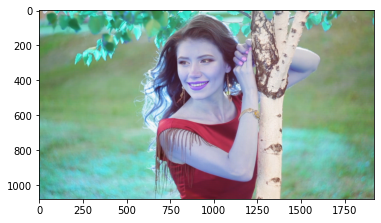

In [99]:
plt.imshow(img)

In [89]:
model = tf.keras.models.load_model("D:\\Main\\MA_PROGR\\Code\\models\\single_rgb_image_big_dataset")

In [90]:
alias_values = np.full((steps_vertikal, steps_horizontal), 0).tolist()


In [91]:
def create_alias_values(img):
    for y in range(int(steps_vertikal)):
        for x in range(int(steps_horizontal)):
            bucket = img[y*BUCKET_SIZE:(y+1)*BUCKET_SIZE, x *
                         BUCKET_SIZE:(x+1)*BUCKET_SIZE] / 255
            # buckets[y][x]=bucket
            # print(bucket.shape)
            tmp_res = model.predict(bucket.reshape(
                1, BUCKET_SIZE, BUCKET_SIZE, 3))
            alias_values[y][x] = 1 - float(tmp_res)
    return alias_values


single_RGB_Model_result = create_alias_values(img)


In [92]:

np.array(single_RGB_Model_result).shape


(18, 32)

In [93]:
print(single_RGB_Model_result)


[[0.0107269287109375, 0.1322292685508728, 0.16621965169906616, 0.33907240629196167, 0.9298036098480225, 0.9850981533527374, 0.7825188040733337, 0.08442676067352295, 0.4142158031463623, 0.3338239789009094, 0.6231384873390198, 0.01936662197113037, 0.027803897857666016, 0.9786190390586853, 0.9935609400272369, 0.0014957189559936523, 0.017108380794525146, 0.013682305812835693, 0.09327197074890137, 0.005083680152893066, 0.0017111897468566895, 0.0015511512756347656, 0.012989401817321777, 0.0008388161659240723, 0.0013756155967712402, 0.0005189180374145508, 0.014723777770996094, 0.02680075168609619, 0.004119515419006348, 0.00042951107025146484, 0.0001537799835205078, 0.0002974271774291992], [0.0979318618774414, 0.00021761655807495117, 0.021856367588043213, 0.00010293722152709961, 0.014463663101196289, 0.02789747714996338, 0.4974791407585144, 0.0895567536354065, 0.9491287469863892, 0.26522624492645264, 0.0025011301040649414, 0.0038470029830932617, 0.9277113974094391, 0.006276845932006836, 0.0003

In [94]:
np.save(f"{IMG_PATH}\\{img_name.split('.')[0]}_single_rgb_cnn_matrix", single_RGB_Model_result)
